# Criação do gráfico

🔍 Arquivos encontrados (5):
- comparacao_horario_pico.csv
- comparacao_padroes_temporais.csv
- comparacao_receita_media.csv
- comparacao_tiprate_borough.csv
- comparacao_trip_category.csv

✅ Arquivo unificado salvo em: analysis_results\comparacao_geral.csv

=== Resumo da Comparação Geral ===
                            Consulta Ferramenta  Tempo Médio (s)  Sucesso  \
0    Horário de pico (rank por hora)     DuckDB            0.343     True   
1    Horário de pico (rank por hora)     Pandas            4.918     True   
2     Padrões temporais (mês/semana)     DuckDB            0.654     True   
3     Padrões temporais (mês/semana)     Pandas           20.780     True   
4     Top 10 zonas por receita média     DuckDB            0.132     True   
5     Top 10 zonas por receita média     Pandas            1.732     True   
6  Taxa média de gorjeta por borough     DuckDB            0.454     True   
7  Taxa média de gorjeta por borough     Pandas           12.209     True   
8           Vi

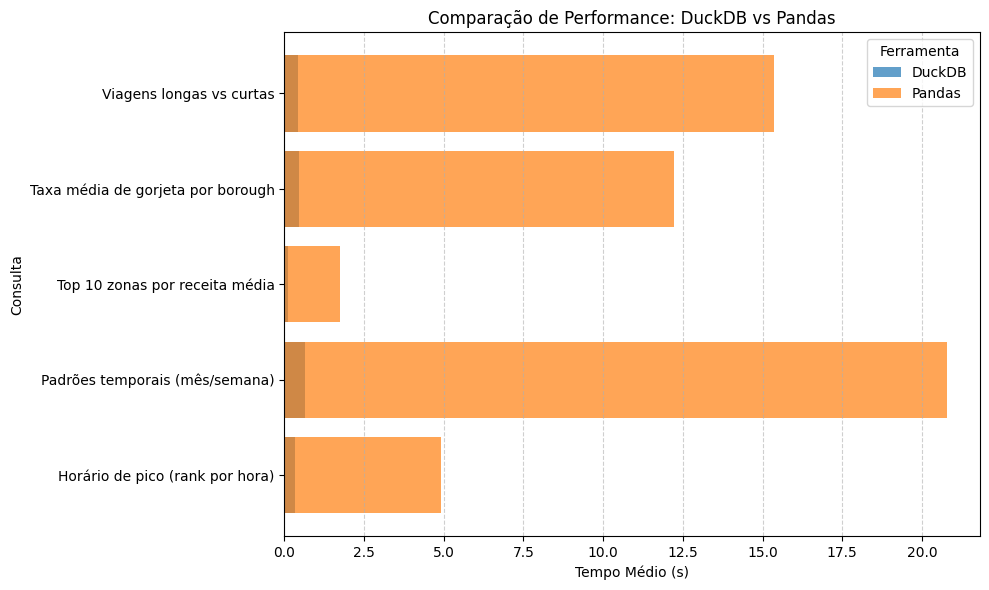

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Diretório onde estão os arquivos
INPUT_DIR = "analysis_results"
OUTPUT_FILE = os.path.join(INPUT_DIR, "comparacao_geral.csv")

# 1️⃣ Localizar todos os arquivos de comparação
arquivos = glob.glob(os.path.join(INPUT_DIR, "comparacao_*.csv"))

if not arquivos:
    raise FileNotFoundError(f"Nenhum arquivo comparacao_*.csv encontrado em {INPUT_DIR}")

print(f"🔍 Arquivos encontrados ({len(arquivos)}):")
for arq in arquivos:
    print("-", os.path.basename(arq))

# 2️⃣ Ler e unir todos os CSVs
dfs = []
for path in arquivos:
    df = pd.read_csv(path)
    dfs.append(df)

comparacao_geral = pd.concat(dfs, ignore_index=True)

# 3️⃣ Salvar o resultado combinado
comparacao_geral.to_csv(OUTPUT_FILE, index=False)
print(f"\n✅ Arquivo unificado salvo em: {OUTPUT_FILE}")

# 4️⃣ Exibir resumo da comparação
print("\n=== Resumo da Comparação Geral ===")
print(comparacao_geral)

# 5️⃣ Criar gráfico comparando tempos médios
plt.figure(figsize=(10, 6))
for ferramenta in comparacao_geral["Ferramenta"].unique():
    subset = comparacao_geral[comparacao_geral["Ferramenta"] == ferramenta]
    plt.barh(subset["Consulta"], subset["Tempo Médio (s)"], label=ferramenta, alpha=0.7)

plt.xlabel("Tempo Médio (s)")
plt.ylabel("Consulta")
plt.title("Comparação de Performance: DuckDB vs Pandas")
plt.legend(title="Ferramenta")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()